# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
cities

['dudinka',
 'rikitea',
 'veraval',
 'mataura',
 'bluff',
 'hermanus',
 'kaitangata',
 'kavieng',
 'quatre cocos',
 'dmitriyevka',
 'sao jose da coroa grande',
 'kapaa',
 'richards bay',
 'ati',
 'mount darwin',
 'mayo',
 'new norfolk',
 'soyo',
 'longyearbyen',
 'airai',
 'butaritari',
 'victoria',
 'puerto ayora',
 'bambous virieux',
 'chokurdakh',
 'eldorado',
 'vardo',
 'punta arenas',
 'beckley',
 'barentsburg',
 'chapais',
 'guarapari',
 'east london',
 'tignere',
 'mys shmidta',
 'ancud',
 'ilulissat',
 'kloulklubed',
 'stornoway',
 'nelson bay',
 'ciudad bolivar',
 'kilindoni',
 'riyadh',
 'vaini',
 'busselton',
 'jamestown',
 'sentyabrskiy',
 'tessalit',
 'carnarvon',
 'nizhneyansk',
 'port alfred',
 'tombouctou',
 'albany',
 'barrow',
 'itoman',
 'narsaq',
 'severo-kurilsk',
 'alice springs',
 'atuona',
 'otane',
 'nikolskoye',
 'dattapur',
 'kodiak',
 'zhigansk',
 'lebu',
 'taolanaro',
 'razole',
 'bluefields',
 'tiksi',
 'bara',
 'illoqqortoormiut',
 'noordwijk',
 'manavala

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="


# Define an empty list to fetch the weather data for each city
city_data = []
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '+')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    city_weather = requests.get(city_url).json()
    print(city_weather)
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

   
    

    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dudinka
{'coord': {'lon': 86.1778, 'lat': 69.4058}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -23.56, 'feels_like': -30.56, 'temp_min': -23.56, 'temp_max': -23.56, 'pressure': 1017, 'humidity': 99, 'sea_level': 1017, 'grnd_level': 1013}, 'visibility': 1385, 'wind': {'speed': 3.61, 'deg': 146, 'gust': 9.29}, 'clouds': {'all': 97}, 'dt': 1675102630, 'sys': {'country': 'RU', 'sunrise': 1675137608, 'sunset': 1675155419}, 'timezone': 25200, 'id': 1507116, 'name': 'Dudinka', 'cod': 200}
Processing Record 2 of Set 1 | rikitea
{'coord': {'lon': -134.9692, 'lat': -23.1203}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 25.99, 'feels_like': 25.99, 'temp_min': 25.99, 'temp_max': 25.99, 'pressure': 1018, 'humidity': 69, 'sea_level': 1018, 'grnd

Processing Record 15 of Set 1 | mount darwin
{'coord': {'lon': 31.5838, 'lat': -16.7725}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 20.77, 'feels_like': 21.12, 'temp_min': 20.77, 'temp_max': 20.77, 'pressure': 1013, 'humidity': 85, 'sea_level': 1013, 'grnd_level': 909}, 'visibility': 10000, 'wind': {'speed': 1.86, 'deg': 71, 'gust': 6.29}, 'rain': {'1h': 0.33}, 'clouds': {'all': 61}, 'dt': 1675102645, 'sys': {'country': 'ZW', 'sunrise': 1675050058, 'sunset': 1675096357}, 'timezone': 7200, 'id': 885800, 'name': 'Mount Darwin', 'cod': 200}
Processing Record 16 of Set 1 | mayo
{'coord': {'lon': -76.5119, 'lat': 38.8876}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.24, 'feels_like': 12.24, 'temp_min': 9.43, 'temp_max': 15.84, 'pressure': 1020, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 124, 'gust': 

{'coord': {'lon': -81.1882, 'lat': 37.7782}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 8.95, 'feels_like': 6.66, 'temp_min': 8.23, 'temp_max': 10.87, 'pressure': 1020, 'humidity': 95}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 200}, 'clouds': {'all': 100}, 'dt': 1675102564, 'sys': {'type': 2, 'id': 2034905, 'country': 'US', 'sunrise': 1675081836, 'sunset': 1675118716}, 'timezone': -18000, 'id': 4798308, 'name': 'Beckley', 'cod': 200}
Processing Record 30 of Set 1 | barentsburg
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 31 of Set 1 | chapais
{'coord': {'lon': -74.8492, 'lat': 49.7834}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -18.12, 'feels_like': -25.12, 'temp_min': -18.12, 'temp_max': -18.12, 'pressure': 1022, 'humidity': 84, 'sea_level': 1022, 'grnd_leve

Processing Record 45 of Set 1 | busselton
{'coord': {'lon': 115.3333, 'lat': -33.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 15.96, 'feels_like': 15.65, 'temp_min': 15.96, 'temp_max': 15.96, 'pressure': 1014, 'humidity': 78, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 5.61, 'deg': 136, 'gust': 11}, 'clouds': {'all': 26}, 'dt': 1675102665, 'sys': {'country': 'AU', 'sunrise': 1675114741, 'sunset': 1675164290}, 'timezone': 28800, 'id': 2075265, 'name': 'Busselton', 'cod': 200}
Processing Record 46 of Set 1 | jamestown
{'coord': {'lon': -79.2353, 'lat': 42.097}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -1.08, 'feels_like': -4.38, 'temp_min': -3.23, 'temp_max': -0.55, 'pressure': 1019, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 260}, 'clouds': {'all': 1

{'coord': {'lon': 30.7861, 'lat': 59.7035}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.73, 'feels_like': -3.07, 'temp_min': -0.12, 'temp_max': 1.94, 'pressure': 979, 'humidity': 82, 'sea_level': 979, 'grnd_level': 975}, 'visibility': 10000, 'wind': {'speed': 5.61, 'deg': 221, 'gust': 12.54}, 'clouds': {'all': 100}, 'dt': 1675102558, 'sys': {'type': 2, 'id': 47750, 'country': 'RU', 'sunrise': 1675059289, 'sunset': 1675087508}, 'timezone': 10800, 'id': 546105, 'name': 'Nikolskoye', 'cod': 200}
Processing Record 12 of Set 2 | dattapur
{'coord': {'lon': 78.1667, 'lat': 20.7667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.69, 'feels_like': 25.25, 'temp_min': 25.69, 'temp_max': 25.69, 'pressure': 1013, 'humidity': 36, 'sea_level': 1013, 'grnd_level': 981}, 'visibility': 10000, 'wind': {'speed': 1.73, 'deg': 38, 'gust'

City not found. Skipping...
Processing Record 28 of Set 2 | korem
{'coord': {'lon': 39.5228, 'lat': 12.5058}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 13.18, 'feels_like': 12.25, 'temp_min': 13.18, 'temp_max': 13.18, 'pressure': 1018, 'humidity': 65, 'sea_level': 1018, 'grnd_level': 763}, 'visibility': 10000, 'wind': {'speed': 1.82, 'deg': 76, 'gust': 2.42}, 'clouds': {'all': 30}, 'dt': 1675102677, 'sys': {'country': 'ET', 'sunrise': 1675050465, 'sunset': 1675092138}, 'timezone': 10800, 'id': 332746, 'name': 'Korem', 'cod': 200}
Processing Record 29 of Set 2 | upernavik
{'coord': {'lon': -56.1549, 'lat': 72.7868}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -18.5, 'feels_like': -23.32, 'temp_min': -18.5, 'temp_max': -18.5, 'pressure': 999, 'humidity': 69, 'sea_level': 999, 'grnd_level': 999}, 'visibility': 10000,

Processing Record 42 of Set 2 | castro
{'coord': {'lon': -50.0119, 'lat': -24.7911}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.67, 'feels_like': 20.8, 'temp_min': 20.67, 'temp_max': 20.67, 'pressure': 1011, 'humidity': 77, 'sea_level': 1011, 'grnd_level': 902}, 'visibility': 10000, 'wind': {'speed': 3.38, 'deg': 332, 'gust': 6.09}, 'clouds': {'all': 100}, 'dt': 1675102602, 'sys': {'country': 'BR', 'sunrise': 1675068925, 'sunset': 1675116661}, 'timezone': -10800, 'id': 3466704, 'name': 'Castro', 'cod': 200}
Processing Record 43 of Set 2 | dikson
{'coord': {'lon': 80.5464, 'lat': 73.5069}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -32.32, 'feels_like': -38.19, 'temp_min': -32.32, 'temp_max': -32.32, 'pressure': 1015, 'humidity': 94, 'sea_level': 1015, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.3

{'coord': {'lon': -69.3632, 'lat': 77.484}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -22.94, 'feels_like': -29.94, 'temp_min': -22.94, 'temp_max': -22.94, 'pressure': 1011, 'humidity': 56, 'sea_level': 1011, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 3.98, 'deg': 47, 'gust': 3.77}, 'clouds': {'all': 4}, 'dt': 1675102553, 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'timezone': -14400, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
Processing Record 10 of Set 3 | shizukuishi
{'coord': {'lon': 140.9833, 'lat': 39.6833}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -6.02, 'feels_like': -11.88, 'temp_min': -6.02, 'temp_max': -6.02, 'pressure': 1015, 'humidity': 87, 'sea_level': 1015, 'grnd_level': 992}, 'visibility': 2903, 'wind': {'speed': 4.25, 'deg': 283, 'gust': 10.71}, 'snow': {'1h': 0.18}, 'clouds': {'a

{'coord': {'lon': 123.7228, 'lat': 11.1373}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.17, 'feels_like': 26.17, 'temp_min': 26.17, 'temp_max': 26.17, 'pressure': 1010, 'humidity': 84, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.35, 'deg': 57, 'gust': 9.11}, 'clouds': {'all': 100}, 'dt': 1675102722, 'sys': {'country': 'PH', 'sunrise': 1675116546, 'sunset': 1675158458}, 'timezone': 28800, 'id': 1685422, 'name': 'Sulangan', 'cod': 200}
Processing Record 26 of Set 3 | naftah
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 27 of Set 3 | bredasdorp
{'coord': {'lon': 20.0403, 'lat': -34.5322}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 19.41, 'feels_like': 19.23, 'temp_min': 19.41, 'temp_max': 19.41, 'pressure': 1016, 'humidity': 70, 'sea_level': 

{'coord': {'lon': -122.8692, 'lat': 38.6105}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 8.3, 'feels_like': 6.76, 'temp_min': 5.8, 'temp_max': 10.12, 'pressure': 1019, 'humidity': 38}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 330}, 'clouds': {'all': 0}, 'dt': 1675102729, 'sys': {'type': 2, 'id': 2011305, 'country': 'US', 'sunrise': 1675091937, 'sunset': 1675128624}, 'timezone': -28800, 'id': 5356012, 'name': 'Healdsburg', 'cod': 200}
Processing Record 41 of Set 3 | guerrero negro
{'coord': {'lon': -114.0611, 'lat': 27.9769}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 15.55, 'feels_like': 14.68, 'temp_min': 15.55, 'temp_max': 15.55, 'pressure': 1018, 'humidity': 58, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 2.86, 'deg': 198, 'gust': 3.81}, 'clouds': {'all': 92}, 'dt': 1675102

{'coord': {'lon': 167.6833, 'lat': -46.1333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14.61, 'feels_like': 14.58, 'temp_min': 14.61, 'temp_max': 14.61, 'pressure': 1017, 'humidity': 94, 'sea_level': 1017, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 1.66, 'deg': 37, 'gust': 1.93}, 'clouds': {'all': 92}, 'dt': 1675102735, 'sys': {'country': 'NZ', 'sunrise': 1675100406, 'sunset': 1675153494}, 'timezone': 46800, 'id': 2180815, 'name': 'Tuatapere', 'cod': 200}
Processing Record 5 of Set 4 | bunbury
{'coord': {'lon': 115.6333, 'lat': -33.3333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 17.63, 'feels_like': 17.41, 'temp_min': 17.63, 'temp_max': 17.63, 'pressure': 1013, 'humidity': 75, 'sea_level': 1013, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 6.61, 'deg': 141, 'gust': 11.27}, 'clouds': {'a

{'coord': {'lon': 14.2845, 'lat': -22.116}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 18.62, 'feels_like': 18.55, 'temp_min': 18.62, 'temp_max': 18.62, 'pressure': 1012, 'humidity': 77, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.21, 'deg': 175, 'gust': 7.37}, 'clouds': {'all': 9}, 'dt': 1675102745, 'sys': {'country': 'NA', 'sunrise': 1675053738, 'sunset': 1675100982}, 'timezone': 7200, 'id': 3356832, 'name': 'Henties Bay', 'cod': 200}
Processing Record 20 of Set 4 | te anau
{'coord': {'lon': 167.7167, 'lat': -45.4167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14.28, 'feels_like': 14.06, 'temp_min': 14.28, 'temp_max': 14.28, 'pressure': 1018, 'humidity': 88, 'sea_level': 1018, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 0.74, 'deg': 120, 'gust': 0.8}, 'clouds': {'all'

{'coord': {'lon': -151.75, 'lat': -16.4833}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 26.97, 'feels_like': 29.31, 'temp_min': 26.97, 'temp_max': 26.97, 'pressure': 1014, 'humidity': 76, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 5.65, 'deg': 54, 'gust': 6.14}, 'rain': {'1h': 0.8}, 'clouds': {'all': 100}, 'dt': 1675102500, 'sys': {'country': 'PF', 'sunrise': 1675094099, 'sunset': 1675140327}, 'timezone': -36000, 'id': 4034551, 'name': 'Faanui', 'cod': 200}
Processing Record 35 of Set 4 | beatrice
{'coord': {'lon': -96.747, 'lat': 40.2681}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -10.99, 'feels_like': -16.14, 'temp_min': -12.07, 'temp_max': -9.9, 'pressure': 1033, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 20}, 'clouds': {'all': 100}, 'dt': 1675102768, 'sys'

{'coord': {'lon': 24.7314, 'lat': -34.0033}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 18.33, 'feels_like': 18.12, 'temp_min': 18.33, 'temp_max': 18.33, 'pressure': 1017, 'humidity': 73, 'sea_level': 1017, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 7.87, 'deg': 91, 'gust': 12.27}, 'clouds': {'all': 84}, 'dt': 1675102785, 'sys': {'country': 'ZA', 'sunrise': 1675049998, 'sunset': 1675099706}, 'timezone': 7200, 'id': 986717, 'name': 'Kruisfontein', 'cod': 200}
Processing Record 50 of Set 4 | tasiilaq
{'coord': {'lon': -37.6368, 'lat': 65.6145}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -10.55, 'feels_like': -17.55, 'temp_min': -10.55, 'temp_max': -10.55, 'pressure': 1006, 'humidity': 81, 'sea_level': 1006, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 4.94, 'deg': 72, 'gust': 9.95}, 'clou

{'coord': {'lon': -72.0662, 'lat': -45.5752}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 17.97, 'feels_like': 16.66, 'temp_min': 17.97, 'temp_max': 19.34, 'pressure': 1016, 'humidity': 32}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 250}, 'clouds': {'all': 20}, 'dt': 1675102702, 'sys': {'type': 1, 'id': 8491, 'country': 'CL', 'sunrise': 1675071612, 'sunset': 1675124560}, 'timezone': -10800, 'id': 3894426, 'name': 'Coyhaique', 'cod': 200}
Processing Record 14 of Set 5 | rio bueno
{'coord': {'lon': -72.9667, 'lat': -40.3167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.08, 'feels_like': 20.63, 'temp_min': 21.08, 'temp_max': 21.73, 'pressure': 1016, 'humidity': 53, 'sea_level': 1016, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.45, 'deg': 201, 'gust': 5.03}, 'clouds': {'all': 98}, 'dt': 16751027

City not found. Skipping...
Processing Record 30 of Set 5 | wamba
{'coord': {'lon': 8.6, 'lat': 8.9333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 32.2, 'feels_like': 30.52, 'temp_min': 32.2, 'temp_max': 32.2, 'pressure': 1006, 'humidity': 25, 'sea_level': 1006, 'grnd_level': 966}, 'visibility': 10000, 'wind': {'speed': 2.11, 'deg': 142, 'gust': 4.2}, 'clouds': {'all': 28}, 'dt': 1675102797, 'sys': {'country': 'NG', 'sunrise': 1675057604, 'sunset': 1675099844}, 'timezone': 3600, 'id': 2319257, 'name': 'Wamba', 'cod': 200}
Processing Record 31 of Set 5 | penalva
{'coord': {'lon': -45.1736, 'lat': -3.2942}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.49, 'feels_like': 31.11, 'temp_min': 27.49, 'temp_max': 27.49, 'pressure': 1008, 'humidity': 82, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {

Processing Record 45 of Set 5 | cam ranh
{'coord': {'lon': 109.1591, 'lat': 11.9214}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 21.98, 'feels_like': 22.01, 'temp_min': 21.98, 'temp_max': 21.98, 'pressure': 1014, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 30}, 'clouds': {'all': 20}, 'dt': 1675102752, 'sys': {'type': 1, 'id': 9304, 'country': 'VN', 'sunrise': 1675120102, 'sunset': 1675161893}, 'timezone': 25200, 'id': 1586350, 'name': 'Cam Ranh', 'cod': 200}
Processing Record 46 of Set 5 | santarem
{'coord': {'lon': -54.7083, 'lat': -2.4431}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.07, 'feels_like': 30.2, 'temp_min': 27.07, 'temp_max': 27.07, 'pressure': 1009, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1675102822, 'sys': {'type': 1

Processing Record 10 of Set 6 | vila velha
{'coord': {'lon': -40.2925, 'lat': -20.3297}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 28.86, 'feels_like': 32.6, 'temp_min': 28.86, 'temp_max': 28.97, 'pressure': 1013, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 50}, 'clouds': {'all': 20}, 'dt': 1675102842, 'sys': {'type': 2, 'id': 2012383, 'country': 'BR', 'sunrise': 1675067004, 'sunset': 1675113915}, 'timezone': -10800, 'id': 3445026, 'name': 'Vila Velha', 'cod': 200}
Processing Record 11 of Set 6 | mandera
{'coord': {'lon': 41.867, 'lat': 3.9366}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 31.73, 'feels_like': 30.41, 'temp_min': 31.73, 'temp_max': 31.73, 'pressure': 1010, 'humidity': 29, 'sea_level': 1010, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 3.99, 'deg': 63, 'gust': 5.87}, 'clouds

{'coord': {'lon': -39.7172, 'lat': -5.4542}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.28, 'feels_like': 30.27, 'temp_min': 30.28, 'temp_max': 30.28, 'pressure': 1008, 'humidity': 42, 'sea_level': 1008, 'grnd_level': 953}, 'visibility': 10000, 'wind': {'speed': 2.68, 'deg': 105, 'gust': 2.87}, 'clouds': {'all': 65}, 'dt': 1675102850, 'sys': {'country': 'BR', 'sunrise': 1675068092, 'sunset': 1675112551}, 'timezone': -10800, 'id': 3392629, 'name': 'Pedra Branca', 'cod': 200}
Processing Record 27 of Set 6 | artyk
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 28 of Set 6 | biak
{'coord': {'lon': 122.8766, 'lat': -0.9131}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.29, 'feels_like': 24.97, 'temp_min': 24.29, 'temp_max': 24.29, 'pressure': 1008, 'humidity': 84, 'sea_level'

{'coord': {'lon': 78.3667, 'lat': 65.9667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -16.51, 'feels_like': -23.51, 'temp_min': -16.51, 'temp_max': -16.51, 'pressure': 1012, 'humidity': 95, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 892, 'wind': {'speed': 6.1, 'deg': 168, 'gust': 12.17}, 'clouds': {'all': 100}, 'dt': 1675102857, 'sys': {'country': 'RU', 'sunrise': 1675050710, 'sunset': 1675073246}, 'timezone': 18000, 'id': 1488414, 'name': 'Urengoy', 'cod': 200}
Processing Record 42 of Set 6 | high prairie
{'coord': {'lon': -116.4858, 'lat': 55.4334}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -13.83, 'feels_like': -13.83, 'temp_min': -13.83, 'temp_max': -13.83, 'pressure': 1025, 'humidity': 91, 'sea_level': 1025, 'grnd_level': 948}, 'visibility': 10000, 'wind': {'speed': 0.79, 'deg': 238, 'gust': 1.28}, 

Processing Record 7 of Set 7 | manhuacu
{'coord': {'lon': -42.0336, 'lat': -20.2581}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.12, 'feels_like': 26.12, 'temp_min': 26.12, 'temp_max': 26.12, 'pressure': 1013, 'humidity': 69, 'sea_level': 1013, 'grnd_level': 941}, 'visibility': 10000, 'wind': {'speed': 3.18, 'deg': 37, 'gust': 3.75}, 'clouds': {'all': 98}, 'dt': 1675102868, 'sys': {'country': 'BR', 'sunrise': 1675067429, 'sunset': 1675114327}, 'timezone': -10800, 'id': 3457952, 'name': 'Manhuaçu', 'cod': 200}
Processing Record 8 of Set 7 | eirunepe
{'coord': {'lon': -69.8736, 'lat': -6.6603}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 23.59, 'feels_like': 24.46, 'temp_min': 23.59, 'temp_max': 23.59, 'pressure': 1011, 'humidity': 94, 'sea_level': 1011, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 0.

Processing Record 21 of Set 7 | los santos
{'coord': {'lon': -80.4167, 'lat': 7.9333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 33, 'feels_like': 36.88, 'temp_min': 33, 'temp_max': 33, 'pressure': 1010, 'humidity': 52, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 7.33, 'deg': 24, 'gust': 9.06}, 'clouds': {'all': 99}, 'dt': 1675102887, 'sys': {'type': 2, 'id': 2037762, 'country': 'PA', 'sunrise': 1675078890, 'sunset': 1675121291}, 'timezone': -18000, 'id': 3704964, 'name': 'Los Santos', 'cod': 200}
Processing Record 22 of Set 7 | arsk
{'coord': {'lon': 49.8778, 'lat': 56.0915}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -3.54, 'feels_like': -9.92, 'temp_min': -3.54, 'temp_max': -3.54, 'pressure': 1009, 'humidity': 95, 'sea_level': 1009, 'grnd_level': 992}, 'visibility': 982, 'wind

{'coord': {'lon': -34.8553, 'lat': -8.0089}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 29.85, 'feels_like': 32.17, 'temp_min': 29.85, 'temp_max': 29.85, 'pressure': 1010, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 1675102905, 'sys': {'type': 1, 'id': 8426, 'country': 'BR', 'sunrise': 1675066725, 'sunset': 1675111584}, 'timezone': -10800, 'id': 3393536, 'name': 'Olinda', 'cod': 200}
Processing Record 39 of Set 7 | nicoya
{'coord': {'lon': -85.452, 'lat': 10.1483}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 33.06, 'feels_like': 33.07, 'temp_min': 33.06, 'temp_max': 33.06, 'pressure': 1010, 'humidity': 36, 'sea_level': 1010, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 5.28, 'deg': 57, 'gust': 6.03}, 'clouds': {'all': 33}, 'dt': 1675102905, 'sys':

{'coord': {'lon': 101.7667, 'lat': 36.6167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -0.49, 'feels_like': -0.49, 'temp_min': -0.49, 'temp_max': -0.49, 'pressure': 1015, 'humidity': 22, 'sea_level': 1015, 'grnd_level': 770}, 'visibility': 10000, 'wind': {'speed': 0.33, 'deg': 212, 'gust': 0.47}, 'clouds': {'all': 0}, 'dt': 1675102911, 'sys': {'country': 'CN', 'sunrise': 1675124166, 'sunset': 1675161378}, 'timezone': 28800, 'id': 1788852, 'name': 'Xining', 'cod': 200}
Processing Record 3 of Set 8 | karpathos
{'coord': {'lon': 27.2132, 'lat': 35.507}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 11.98, 'feels_like': 10.64, 'temp_min': 11.98, 'temp_max': 11.98, 'pressure': 1011, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 9.26, 'deg': 310}, 'clouds': {'all': 22}, 'dt': 1675102912, 'sys': {'type': 1, 'id': 6620, 'count

{'coord': {'lon': -1.2, 'lat': 53.1333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 5.73, 'feels_like': 4.44, 'temp_min': 4.75, 'temp_max': 6.75, 'pressure': 1024, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 323, 'gust': 4.02}, 'clouds': {'all': 22}, 'dt': 1675102917, 'sys': {'type': 2, 'id': 2012283, 'country': 'GB', 'sunrise': 1675065154, 'sunset': 1675096999}, 'timezone': 0, 'id': 2643097, 'name': 'Mansfield', 'cod': 200}
Processing Record 17 of Set 8 | samarai
{'coord': {'lon': 150.6667, 'lat': -10.6167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.85, 'feels_like': 31.58, 'temp_min': 27.85, 'temp_max': 27.85, 'pressure': 1006, 'humidity': 79, 'sea_level': 1006, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 75, 'gust': 2.84}, 'clouds': {'all': 100}, 'dt': 1675102

{'coord': {'lon': 92.0667, 'lat': 49.9811}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -28.12, 'feels_like': -28.12, 'temp_min': -28.12, 'temp_max': -28.12, 'pressure': 1048, 'humidity': 88, 'sea_level': 1048, 'grnd_level': 921}, 'visibility': 10000, 'wind': {'speed': 1.1, 'deg': 221, 'gust': 1.03}, 'clouds': {'all': 17}, 'dt': 1675102929, 'sys': {'country': 'MN', 'sunrise': 1675128457, 'sunset': 1675161743}, 'timezone': 25200, 'id': 1515029, 'name': 'Ulaangom', 'cod': 200}
Processing Record 32 of Set 8 | penzance
{'coord': {'lon': -5.5371, 'lat': 50.1186}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7.38, 'feels_like': 4.34, 'temp_min': 7.09, 'temp_max': 7.38, 'pressure': 1031, 'humidity': 74, 'sea_level': 1031, 'grnd_level': 1028}, 'visibility': 10000, 'wind': {'speed': 4.93, 'deg': 315, 'gust': 5.75}, 'clouds': {'all': 

Processing Record 48 of Set 8 | thunder bay
{'coord': {'lon': -89.3168, 'lat': 48.4001}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -20.05, 'feels_like': -27.05, 'temp_min': -21.01, 'temp_max': -20.05, 'pressure': 1024, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 290, 'gust': 11.32}, 'clouds': {'all': 20}, 'dt': 1675102743, 'sys': {'type': 1, 'id': 906, 'country': 'CA', 'sunrise': 1675085339, 'sunset': 1675119115}, 'timezone': -18000, 'id': 6166142, 'name': 'Thunder Bay', 'cod': 200}
Processing Record 49 of Set 8 | odienne
{'coord': {'lon': -7.5692, 'lat': 9.51}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.87, 'feels_like': 29.66, 'temp_min': 31.87, 'temp_max': 31.87, 'pressure': 1009, 'humidity': 14, 'sea_level': 1009, 'grnd_level': 963}, 'visibility': 10000, 'wind': {'speed': 1.36, 'deg': 60, 

{'coord': {'lon': -77.0636, 'lat': 26.5412}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 24.61, 'feels_like': 25.03, 'temp_min': 24.61, 'temp_max': 24.61, 'pressure': 1022, 'humidity': 73, 'sea_level': 1022, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 4.18, 'deg': 107, 'gust': 4.46}, 'clouds': {'all': 2}, 'dt': 1675102965, 'sys': {'country': 'BS', 'sunrise': 1675079648, 'sunset': 1675118923}, 'timezone': -18000, 'id': 3571913, 'name': 'Marsh Harbour', 'cod': 200}
Processing Record 13 of Set 9 | petropavlovsk-kamchatskiy
{'coord': {'lon': 158.6483, 'lat': 53.0452}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -5.67, 'feels_like': -12.67, 'temp_min': -5.67, 'temp_max': -5.67, 'pressure': 996, 'humidity': 46}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 290, 'gust': 12}, 'clouds': {'all': 75}, 'dt': 167510296

Processing Record 27 of Set 9 | prainha
{'coord': {'lon': -53.48, 'lat': -1.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.43, 'feels_like': 32.43, 'temp_min': 30.43, 'temp_max': 30.43, 'pressure': 1007, 'humidity': 54, 'sea_level': 1007, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 1.68, 'deg': 100, 'gust': 3.81}, 'clouds': {'all': 60}, 'dt': 1675102971, 'sys': {'country': 'BR', 'sunrise': 1675071678, 'sunset': 1675115572}, 'timezone': -10800, 'id': 3391287, 'name': 'Prainha', 'cod': 200}
Processing Record 28 of Set 9 | toguchin
{'coord': {'lon': 84.3858, 'lat': 55.2353}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -14.11, 'feels_like': -19.67, 'temp_min': -14.11, 'temp_max': -14.11, 'pressure': 1031, 'humidity': 96, 'sea_level': 1031, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 2.46

{'coord': {'lon': 47.4454, 'lat': 50.6803}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -4.6, 'feels_like': -10.55, 'temp_min': -4.6, 'temp_max': -4.6, 'pressure': 1017, 'humidity': 84, 'sea_level': 1017, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 4.82, 'deg': 183, 'gust': 11.72}, 'clouds': {'all': 68}, 'dt': 1675102977, 'sys': {'country': 'RU', 'sunrise': 1675052974, 'sunset': 1675085826}, 'timezone': 14400, 'id': 509269, 'name': 'Piterka', 'cod': 200}
Processing Record 43 of Set 9 | johi
{'coord': {'lon': 67.6133, 'lat': 26.6921}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15.47, 'feels_like': 13.83, 'temp_min': 15.47, 'temp_max': 15.47, 'pressure': 1021, 'humidity': 29, 'sea_level': 1021, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 2.61, 'deg': 353, 'gust': 2.65}, 'clouds': {'all': 0}, 'dt

Processing Record 7 of Set 10 | rayagada
{'coord': {'lon': 83.4167, 'lat': 19.1667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 18.95, 'feels_like': 19.28, 'temp_min': 18.95, 'temp_max': 18.95, 'pressure': 1016, 'humidity': 91, 'sea_level': 1016, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 203, 'gust': 1.43}, 'clouds': {'all': 5}, 'dt': 1675102988, 'sys': {'country': 'IN', 'sunrise': 1675040481, 'sunset': 1675081050}, 'timezone': 19800, 'id': 1258289, 'name': 'Rāyagada', 'cod': 200}
Processing Record 8 of Set 10 | winchester
{'coord': {'lon': -1.3187, 'lat': 51.0651}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 4.93, 'feels_like': 3.23, 'temp_min': 3.03, 'temp_max': 5.85, 'pressure': 1026, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 270}, 'clouds': {'all': 35}, 'dt': 16

{'coord': {'lon': -81.2147, 'lat': -4.2714}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.81, 'feels_like': 31.92, 'temp_min': 29.81, 'temp_max': 29.81, 'pressure': 1010, 'humidity': 57, 'sea_level': 1010, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 4.8, 'deg': 266, 'gust': 3.69}, 'clouds': {'all': 67}, 'dt': 1675103007, 'sys': {'type': 1, 'id': 8685, 'country': 'PE', 'sunrise': 1675078145, 'sunset': 1675122419}, 'timezone': -18000, 'id': 3697441, 'name': 'El Alto', 'cod': 200}
Processing Record 23 of Set 10 | vila do maio
{'coord': {'lon': -23.2167, 'lat': 15.1333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 23.44, 'feels_like': 23.69, 'temp_min': 23.44, 'temp_max': 23.44, 'pressure': 1013, 'humidity': 71, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 6.48, 'deg': 46

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 37 of Set 10 | ostrovnoy
{'coord': {'lon': 39.5131, 'lat': 68.0531}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -2.71, 'feels_like': -9.27, 'temp_min': -2.71, 'temp_max': -2.71, 'pressure': 981, 'humidity': 91, 'sea_level': 981, 'grnd_level': 978}, 'visibility': 1676, 'wind': {'speed': 6.73, 'deg': 157, 'gust': 11.71}, 'snow': {'1h': 0.14}, 'clouds': {'all': 100}, 'dt': 1675103021, 'sys': {'country': 'RU', 'sunrise': 1675061463, 'sunset': 1675081145}, 'timezone': 10800, 'id': 556268, 'name': 'Ostrovnoy', 'cod': 200}
Processing Record 38 of Set 10 | nau
{'coord': {'lon': 69.3686, 'lat': 40.1525}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.67, 'feels_like': -3.73, 'temp_min': -0.67, 'temp_max': -0.67, 'pressure': 1022, 'humidity': 6

{'coord': {'lon': -65.4117, 'lat': -24.7859}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.33, 'feels_like': 26.33, 'temp_min': 26.33, 'temp_max': 26.33, 'pressure': 1012, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 340}, 'clouds': {'all': 75}, 'dt': 1675103032, 'sys': {'type': 1, 'id': 8267, 'country': 'AR', 'sunrise': 1675072623, 'sunset': 1675120355}, 'timezone': -10800, 'id': 3838233, 'name': 'Salta', 'cod': 200}
Processing Record 2 of Set 11 | koroni
{'coord': {'lon': 21.95, 'lat': 36.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.84, 'feels_like': 9.89, 'temp_min': 10.84, 'temp_max': 10.84, 'pressure': 1014, 'humidity': 73, 'sea_level': 1014, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 4.01, 'deg': 317, 'gust': 4.81}, 'clouds': {'all': 53}, 'dt': 1675103032, 'sys': {'t

{'coord': {'lon': -68.15, 'lat': -16.5}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.99, 'feels_like': 13.17, 'temp_min': 13.99, 'temp_max': 13.99, 'pressure': 1034, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 90}, 'clouds': {'all': 75}, 'dt': 1675103038, 'sys': {'type': 1, 'id': 8648, 'country': 'BO', 'sunrise': 1675074026, 'sunset': 1675120267}, 'timezone': -14400, 'id': 3911925, 'name': 'La Paz', 'cod': 200}
Processing Record 17 of Set 11 | bay roberts
{'coord': {'lon': -53.2648, 'lat': 47.5999}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 6.35, 'feels_like': 2.87, 'temp_min': 5.7, 'temp_max': 7.3, 'pressure': 1012, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 5.36, 'deg': 244, 'gust': 9.39}, 'rain': {'1h': 0.89}, 'clouds': {'all': 100}, 'dt': 1675103039, 'sys': {'type': 2, 'id': 2002

{'coord': {'lon': -67.5, 'lat': -45.8667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 16.92, 'feels_like': 16.21, 'temp_min': 16.92, 'temp_max': 16.92, 'pressure': 1014, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 9.26, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1675102981, 'sys': {'type': 1, 'id': 8284, 'country': 'AR', 'sunrise': 1675070465, 'sunset': 1675123516}, 'timezone': -10800, 'id': 3860443, 'name': 'Comodoro Rivadavia', 'cod': 200}
Processing Record 31 of Set 11 | concordia
{'coord': {'lon': -58.0209, 'lat': -31.393}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 33.04, 'feels_like': 32.2, 'temp_min': 33.04, 'temp_max': 33.04, 'pressure': 1007, 'humidity': 31}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 170}, 'clouds': {'all': 40}, 'dt': 1675102875, 'sys': {'type': 1, 'id': 8703, 'country': 'AR'

{'coord': {'lon': 0.8973, 'lat': 5.7947}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.12, 'feels_like': 31.77, 'temp_min': 28.12, 'temp_max': 28.12, 'pressure': 1009, 'humidity': 76, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.17, 'deg': 170, 'gust': 5.4}, 'clouds': {'all': 95}, 'dt': 1675103064, 'sys': {'country': 'GH', 'sunrise': 1675059209, 'sunset': 1675101937}, 'timezone': 0, 'id': 2304548, 'name': 'Anloga', 'cod': 200}
Processing Record 46 of Set 11 | louisbourg
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 47 of Set 11 | campos
{'coord': {'lon': -41.3, 'lat': -21.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 30.03, 'feels_like': 33.3, 'temp_min': 30.03, 'temp_max': 30.03, 'pressure': 1011, 'humidity': 62}, 'visibility': 10000, 'win

{'coord': {'lon': -105.2842, 'lat': 55.1001}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -21.86, 'feels_like': -28.86, 'temp_min': -21.88, 'temp_max': -21.86, 'pressure': 1022, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 290, 'gust': 8.75}, 'clouds': {'all': 0}, 'dt': 1675103080, 'sys': {'type': 1, 'id': 696, 'country': 'CA', 'sunrise': 1675090569, 'sunset': 1675121550}, 'timezone': -21600, 'id': 6050066, 'name': 'La Ronge', 'cod': 200}
Processing Record 12 of Set 12 | ingham
{'coord': {'lon': -84.3833, 'lat': 42.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -5.9, 'feels_like': -12.39, 'temp_min': -6.79, 'temp_max': -5.03, 'pressure': 1023, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 290, 'gust': 7.2}, 'clouds': {'all': 100}, 'dt': 1675103081, 'sys': {'type': 1, 'id': 601

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 29 of Set 12 | amga
{'coord': {'lon': 131.9608, 'lat': 60.8953}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -48.16, 'feels_like': -48.16, 'temp_min': -48.16, 'temp_max': -48.16, 'pressure': 1021, 'humidity': 100, 'sea_level': 1021, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 0.44, 'deg': 204, 'gust': 0.46}, 'clouds': {'all': 75}, 'dt': 1675103087, 'sys': {'country': 'RU', 'sunrise': 1675121727, 'sunset': 1675149322}, 'timezone': 32400, 'id': 2027786, 'name': 'Amga', 'cod': 200}
Processing Record 30 of Set 12 | bayanday
{'coord': {'lon': 105.5139, 'lat': 53.0661}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -19.47, 'feels_like': -24.7, 'temp_min': -19.47, 'temp_max': -19.47, 'pressure': 1028, 'humidity': 100, 'sea_l

{'coord': {'lon': 48.4167, 'lat': -17.8333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 21.4, 'feels_like': 22.1, 'temp_min': 21.4, 'temp_max': 21.4, 'pressure': 1014, 'humidity': 96, 'sea_level': 1014, 'grnd_level': 928}, 'visibility': 10000, 'wind': {'speed': 2.26, 'deg': 121, 'gust': 6.94}, 'rain': {'1h': 0.38}, 'clouds': {'all': 71}, 'dt': 1675103094, 'sys': {'country': 'MG', 'sunrise': 1675045925, 'sunset': 1675092409}, 'timezone': 10800, 'id': 1082639, 'name': 'Ambatondrazaka', 'cod': 200}
Processing Record 44 of Set 12 | samusu
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 45 of Set 12 | prescott valley
{'coord': {'lon': -112.3252, 'lat': 34.5894}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 3.37, 'feels_like': -1.09, 'temp_min': 2.28, 'temp_max': 4.28, 'pressure': 1015, '

{'coord': {'lon': -16.3333, 'lat': 33.0833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.68, 'feels_like': 12.75, 'temp_min': 13.68, 'temp_max': 13.68, 'pressure': 1023, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 40}, 'clouds': {'all': 75}, 'dt': 1675103101, 'sys': {'type': 1, 'id': 6902, 'country': 'PT', 'sunrise': 1675065739, 'sunset': 1675103679}, 'timezone': 0, 'id': 2270385, 'name': 'Camacha', 'cod': 200}
Processing Record 9 of Set 13 | paraiso
{'coord': {'lon': -83.8656, 'lat': 9.8383}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.17, 'feels_like': 26.17, 'temp_min': 22.45, 'temp_max': 27.71, 'pressure': 1015, 'humidity': 49, 'sea_level': 1015, 'grnd_level': 875}, 'visibility': 10000, 'wind': {'speed': 2.8, 'deg': 47, 'gust': 2.86}, 'clouds': {'all': 100}, 'dt': 1675103101, 'sys': {

{'coord': {'lon': 32.3622, 'lat': 66.845}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -3, 'feels_like': -7.26, 'temp_min': -3, 'temp_max': -3, 'pressure': 975, 'humidity': 97, 'sea_level': 975, 'grnd_level': 967}, 'visibility': 604, 'wind': {'speed': 3.16, 'deg': 68, 'gust': 6.03}, 'snow': {'1h': 0.16}, 'clouds': {'all': 100}, 'dt': 1675103122, 'sys': {'country': 'RU', 'sunrise': 1675062286, 'sunset': 1675083755}, 'timezone': 10800, 'id': 463838, 'name': 'Zelenoborskiy', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
len(city_data)

575

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dudinka,69.4058,86.1778,-23.56,99,97,3.61,RU,1675102630
1,rikitea,-23.1203,-134.9692,25.99,69,15,3.79,PF,1675102514
2,veraval,20.9000,70.3667,19.78,42,3,5.28,IN,1675102632
3,mataura,-46.1927,168.8643,11.96,98,90,1.31,NZ,1675102499
4,bluff,-46.6000,168.3333,13.81,92,95,2.49,NZ,1675102527


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,-23.56,99,97,3.61,RU,1675102630
1,rikitea,-23.1203,-134.9692,25.99,69,15,3.79,PF,1675102514
2,veraval,20.9000,70.3667,19.78,42,3,5.28,IN,1675102632
3,mataura,-46.1927,168.8643,11.96,98,90,1.31,NZ,1675102499
4,bluff,-46.6000,168.3333,13.81,92,95,2.49,NZ,1675102527


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

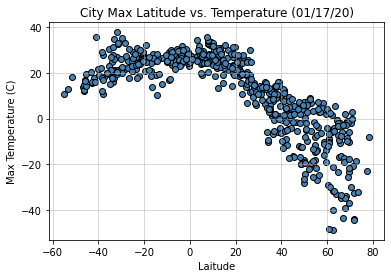

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

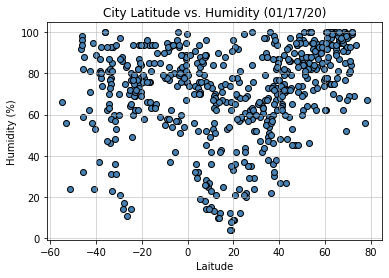

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

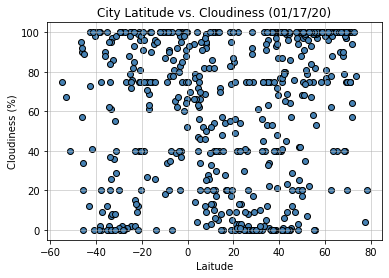

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

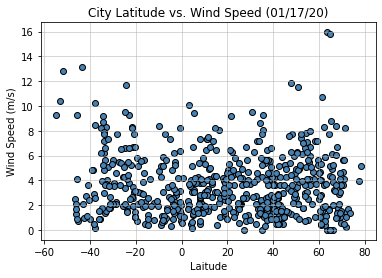

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,-23.56,99,97,3.61,RU,1675102630
2,veraval,20.9000,70.3667,19.78,42,3,5.28,IN,1675102632
9,dmitriyevka,54.7500,55.3333,-8.25,92,100,7.11,RU,1675102640
11,kapaa,22.0752,-159.3190,20.61,92,100,2.68,US,1675102570
13,ati,13.2154,18.3353,30.94,10,5,3.67,TD,1675102644


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rikitea,-23.1203,-134.9692,25.99,69,15,3.79,PF,1675102514
3,mataura,-46.1927,168.8643,11.96,98,90,1.31,NZ,1675102499
4,bluff,-46.6000,168.3333,13.81,92,95,2.49,NZ,1675102527
5,hermanus,-34.4187,19.2345,20.45,65,0,9.21,ZA,1675102634
6,kaitangata,-46.2817,169.8464,12.40,96,57,2.10,NZ,1675102635


###  Temperature vs. Latitude Linear Regression Plot

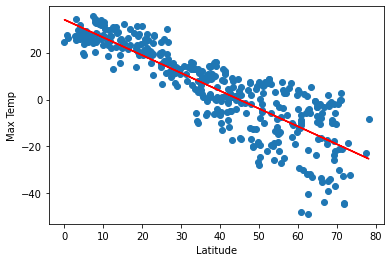

The r-squared is: 0.7300598850443495


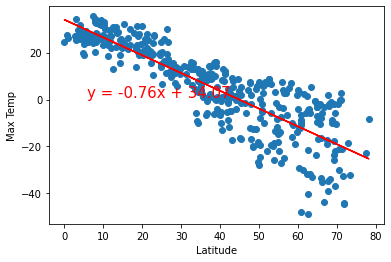

In [46]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", 
                       "Max Temp",(10,40))

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()    


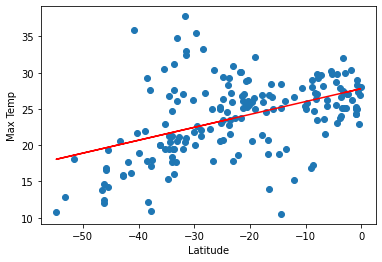

The r-squared is: 0.21634472808808022


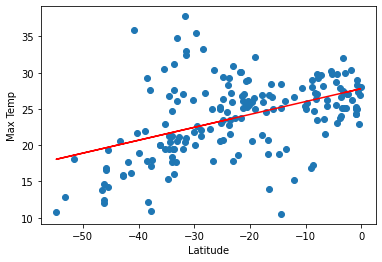

In [48]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()    



**Discussion about the linear relationship:** 

The correlation between the latitude and the maximum temperature for the Northern Hemisphere is a negative correlation with an r-value of 0.7. This is a strong correlation since the r-value for the Northern Hemisphere is close to 1.0. The correlation between the latitude and the maximum temperature for the Southern Hemisphere is a positive correlation with a r-vale of 0.2. This is a weak correlation since the r-value for the Southern Hemisphere is close to 0.2.

### Humidity vs. Latitude Linear Regression Plot

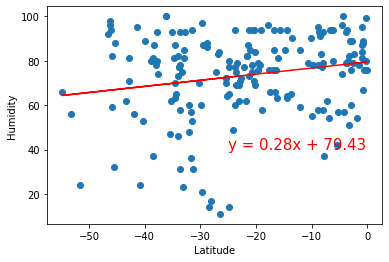

The r-squared is: 0.039093370813103955


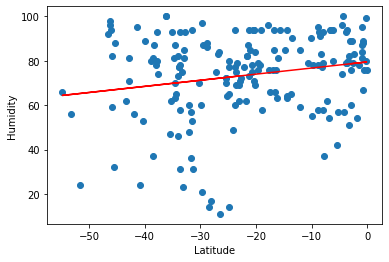

In [49]:
# Northern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Humidity', 
                       'Humidity',(-25,40))

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()    

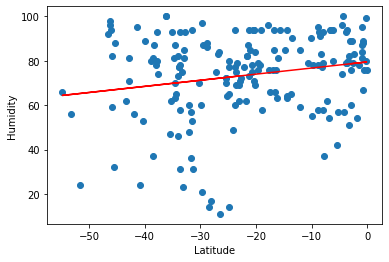

The r-squared is: 0.039093370813103955


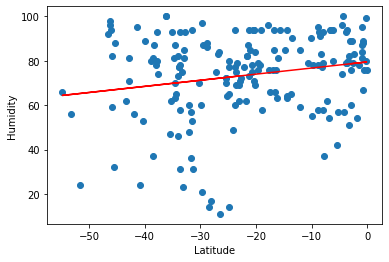

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", 'Humidity',(-60,10))

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()    

**Discussion about the linear relationship:** 

The correlation between the latitude and the humidity for the Northern Hemisphere is a positive correlation with an r-value of 0.04. This is a week correlation since the r-value for the Northern Hemisphere is close to 0.2. The correlation between the latitude and the humidity for the Southern Hemisphere is a positive correlation with a r-vale of 0.04. This is a weak correlation as well since the r-value for the Southern Hemisphere is close to 0.2.

### Cloudiness vs. Latitude Linear Regression Plot

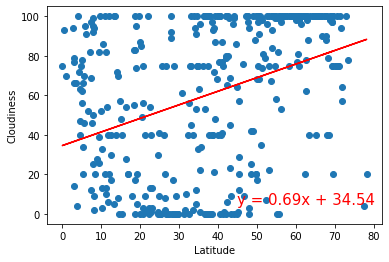

The r-squared is: 0.1393057221981419


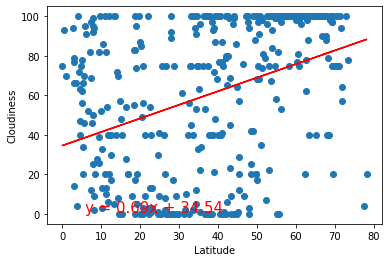

In [51]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for % Cloudiness", 'Cloudiness',(45,5))

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()    

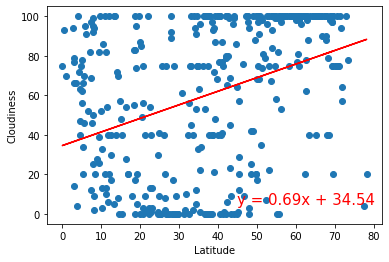

The r-squared is: 0.1393057221981419


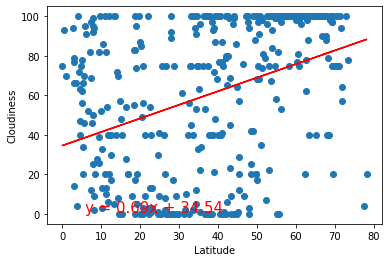

In [52]:
# Southern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for % Cloudiness", 'Cloudiness',(45,5))
                       
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()    

**Discussion about the linear relationship:** 

The correlation between the latitude and the cloudiness for the Northern Hemisphere is a positive correlation with an r-value of 0.1. This is a weak correlation since the r-value for the Northern Hemisphere is close to 0.2. The correlation between the latitude and the cloudiness for the Southern Hemisphere is a positive correlation with a r-vale of 0.1. This is a weak correlation since the r-value for the Southern Hemisphere is close to 0.2.

### Wind Speed vs. Latitude Linear Regression Plot

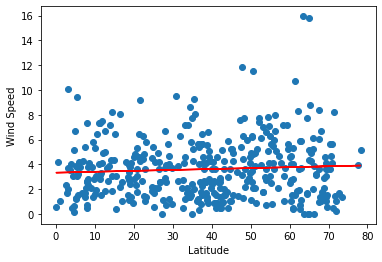

The r-squared is: 0.003877913039024876


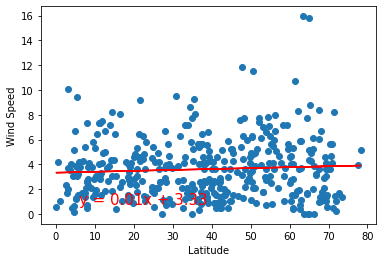

In [53]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,30))

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()    

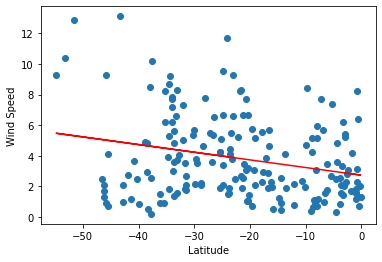

The r-squared is: 0.0650092182805765


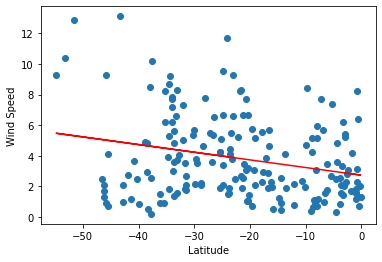

In [54]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()    

**Discussion about the linear relationship:** 

The correlation between the latitude and the wind speed for the Northern Hemisphere is a very weak correlation with an r-value of 0.003. This is a very weak correlation since the r-value for the Northern Hemisphere is close to 0.02. The correlation between the latitude and the wind speed for the Southern Hemisphere is a weak very low correlation with a r-vale of 0.06. This is a weak correlation since the r-value for the Southern Hemisphere is close to 0.2.